In [1]:
import os
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import folium
import openpyxl
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_vaccinations = pd.read_csv("country_vaccinations.csv")
df_country_variables = pd.read_csv("country_profile_variables.csv")
df_kiva = pd.read_csv("kiva_country_profile_variables.csv")
CPI2020 = pd.read_excel("CPI2020.xlsx")
Vaccines_Origin_Country = pd.read_excel("VaccinsOrigin_Country.xlsx")

In [3]:
df_vaccinations.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

             vaccines                source_name  \
0  Oxford/AstraZeneca  Government of Afghanistan   
1  Oxford/AstraZeneca  Government of Afghanistan   
2  Oxford/AstraZeneca  Government of Afghanistan   
3  Oxford/AstraZeneca  Government of Afghanistan   
4  Oxford/AstraZeneca  Government of Afghanistan   

                                      source_website  
0  https://reliefweb.int/report/afghanistan/afgha...  
1  https://reliefweb.int/report/afghanistan/afgha...  
2  https://reliefweb.int/report/afghanistan/afgha...  
3  https://reliefweb.int/report/afghanistan/afgha...  
4  https://reliefweb.int/report/afghanistan/afgha...

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

             vaccines                source_name  \
0  Oxford/AstraZeneca  Government of Afghanistan   
1  Oxford/AstraZeneca  Government of Afghanistan   
2  Oxford/AstraZeneca  Government of Afghanistan   
3  Oxford/AstraZeneca  Government of Afghanistan   
4  Oxford/AstraZeneca  Government of Afghanistan   

                                      source_website  
0  https://reliefweb.int/report/afghanistan/afgha...  
1  https://reliefweb.int/report/afghanistan/afgha...  
2  https://reliefweb.int/report/afghanistan/afgha...  
3  https://reliefweb.int/report/afghanistan/afgha...  
4  https://reliefweb.int/report/afghanistan/afgha...

In [4]:
print(df_vaccinations.dtypes)

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object
country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64

In [5]:
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])
print("The dataset contains vaccination information since :" ,  df_vaccinations['date'].min(),"to :" , df_vaccinations['date'].max()) 

The dataset contains vaccination information since : 2020-12-14 00:00:00 to : 2021-04-29 00:00:00
The dataset contains vaccination information since : 2020-12-14 00:00:00 to : 2021-04-29 00:00:00


In [6]:
coutry_vacc_fltrd = df_vaccinations.drop(["iso_code", "date","daily_vaccinations_raw",
                                          "people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred",
                                          "source_name" , "source_website"] , axis=1)

In [7]:
country_vac_grpd = coutry_vacc_fltrd.groupby(['country'],as_index=False).sum()
print ( "There are " ,country_vac_grpd["country"].nunique() , "different countries in the dataset")

There are  194 different countries in the dataset
There are  194 different countries in the dataset


In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
country_vac_grpd

country  total_vaccinations  people_vaccinated  \
0                         Afghanistan        4.222000e+05       4.222000e+05   
1                             Albania        8.712987e+06       1.450100e+04   
2                             Algeria        7.503000e+04       0.000000e+00   
3                             Andorra        1.280360e+05       5.375700e+04   
4                              Angola        1.551757e+06       1.551757e+06   
5                            Anguilla        3.581300e+04       3.503000e+04   
6                 Antigua and Barbuda        2.445320e+05       2.445320e+05   
7                           Argentina        2.644366e+08       2.204284e+08   
8                             Armenia        5.650000e+02       5.650000e+02   
9                               Aruba        1.097850e+06       7.955600e+05   
10                          Australia        4.776510e+07       1.238684e+06   
11                            Austria        1.215548e+08       8.747984e+07   
12                         Azerbaijan        3.972762e+07       2.737256e+07   
13                            Bahamas        7.970900e+04       7.970900e+04   
14                            Bahrain        4.701133e+07       3.912226e+07   
15                         Bangladesh        2.196219e+08       1.974500e+08   
16                           Barbados        3.188134e+06       3.188134e+06   
17                            Belarus        5.651060e+05       4.184060e+05   
18                            Belgium        1.469281e+08       1.074895e+08   
19                             Belize        5.846220e+05       5.846220e+05   
20                            Bermuda        4.502020e+05       2.581180e+05   
21                             Bhutan        1.501612e+07       1.501612e+07   
22                            Bolivia        1.884246e+07       1.341042e+07   
23             Bosnia and Herzegovina        1.500000e+04       7.837600e+04   
24                           Botswana        1.812170e+05       1.812170e+05   
25                             Brazil        1.279594e+09       9.775847e+08   
26                             Brunei        1.337800e+04       1.337800e+04   
27                           Bulgaria        3.224480e+07       2.565250e+07   
28                           Cambodia        5.152603e+07       3.731200e+07   
29                           Cameroon        4.000000e+02       4.000000e+02   
30                             Canada        4.310686e+08       3.759395e+08   
31                         Cape Verde        2.184000e+03       2.184000e+03   
32                     Cayman Islands        1.178565e+06       6.811210e+05   
33                              Chile        6.341024e+08       4.251199e+08   
34                              China        6.679482e+09       0.000000e+00   
35                           Colombia        1.186463e+08       8.722967e+07   
36                              Congo        1.429700e+04       1.429700e+04   
37                         Costa Rica        5.136816e+06       3.358065e+06   
38                      Cote d'Ivoire        2.479032e+06       2.479032e+06   
39                            Croatia        2.287102e+07       1.800760e+07   
40                            Curacao        1.453834e+06       1.133761e+06   
41                             Cyprus        2.183692e+06       1.581772e+06   
42                            Czechia        1.227962e+08       8.438972e+07   
43       Democratic Republic of Congo        1.700000e+03       1.700000e+03   
44                            Denmark        8.771947e+07       5.982387e+07   
45                           Djibouti        1.024600e+04       1.024600e+04   
46                           Dominica        2.223460e+05       2.141680e+05   
47                 Dominican Republic        1.451981e+07       1.077674e+07   
48                            Ecuador        1.347511e+07       9.813046e+06   
49                            

country  total_vaccinations  people_vaccinated  \
0                         Afghanistan        4.222000e+05       4.222000e+05   
1                             Albania        8.712987e+06       1.450100e+04   
2                             Algeria        7.503000e+04       0.000000e+00   
3                             Andorra        1.280360e+05       5.375700e+04   
4                              Angola        1.551757e+06       1.551757e+06   
5                            Anguilla        3.581300e+04       3.503000e+04   
6                 Antigua and Barbuda        2.445320e+05       2.445320e+05   
7                           Argentina        2.644366e+08       2.204284e+08   
8                             Armenia        5.650000e+02       5.650000e+02   
9                               Aruba        1.097850e+06       7.955600e+05   
10                          Australia        4.776510e+07       1.238684e+06   
11                            Austria        1.215548e+08       8.747984e+07   
12                         Azerbaijan        3.972762e+07       2.737256e+07   
13                            Bahamas        7.970900e+04       7.970900e+04   
14                            Bahrain        4.701133e+07       3.912226e+07   
15                         Bangladesh        2.196219e+08       1.974500e+08   
16                           Barbados        3.188134e+06       3.188134e+06   
17                            Belarus        5.651060e+05       4.184060e+05   
18                            Belgium        1.469281e+08       1.074895e+08   
19                             Belize        5.846220e+05       5.846220e+05   
20                            Bermuda        4.502020e+05       2.581180e+05   
21                             Bhutan        1.501612e+07       1.501612e+07   
22                            Bolivia        1.884246e+07       1.341042e+07   
23             Bosnia and Herzegovina        1.500000e+04       7.837600e+04   
24                           Botswana        1.812170e+05       1.812170e+05   
25                             Brazil        1.279594e+09       9.775847e+08   
26                             Brunei        1.337800e+04       1.337800e+04   
27                           Bulgaria        3.224480e+07       2.565250e+07   
28                           Cambodia        5.152603e+07       3.731200e+07   
29                           Cameroon        4.000000e+02       4.000000e+02   
30                             Canada        4.310686e+08       3.759395e+08   
31                         Cape Verde        2.184000e+03       2.184000e+03   
32                     Cayman Islands        1.178565e+06       6.811210e+05   
33                              Chile        6.341024e+08       4.251199e+08   
34                              China        6.679482e+09       0.000000e+00   
35                           Colombia        1.186463e+08       8.722967e+07   
36                              Congo        1.429700e+04       1.429700e+04   
37                         Costa Rica        5.136816e+06       3.358065e+06   
38                      Cote d'Ivoire        2.479032e+06       2.479032e+06   
39                            Croatia        2.287102e+07       1.800760e+07   
40                            Curacao        1.453834e+06       1.133761e+06   
41                             Cyprus        2.183692e+06       1.581772e+06   
42                            Czechia        1.227962e+08       8.438972e+07   
43       Democratic Republic of Congo        1.700000e+03       1.700000e+03   
44                            Denmark        8.771947e+07       5.982387e+07   
45                           Djibouti        1.024600e+04       1.024600e+04   
46                           Dominica        2.223460e+05       2.141680e+05   
47                 Dominican Republic        1.451981e+07       1.077674e+07   
48                            Ecuador        1.347511e+07       9.813046e+06   
49                            

In [9]:
country_vac_grpd.isnull().sum()

country                           0
total_vaccinations                0
people_vaccinated                 0
people_fully_vaccinated           0
daily_vaccinations                0
total_vaccinations_per_hundred    0
daily_vaccinations_per_million    0
dtype: int64

country                           0
total_vaccinations                0
people_vaccinated                 0
people_fully_vaccinated           0
daily_vaccinations                0
total_vaccinations_per_hundred    0
daily_vaccinations_per_million    0
dtype: int64

In [10]:
df_country_variables

country             Region  \
0                                  Afghanistan       SouthernAsia   
1                                      Albania     SouthernEurope   
2                                      Algeria     NorthernAfrica   
3                               American Samoa          Polynesia   
4                                      Andorra     SouthernEurope   
5                                       Angola       MiddleAfrica   
6                                     Anguilla          Caribbean   
7                          Antigua and Barbuda          Caribbean   
8                                    Argentina       SouthAmerica   
9                                      Armenia        WesternAsia   
10                                       Aruba          Caribbean   
11                                   Australia            Oceania   
12                                     Austria      WesternEurope   
13                                  Azerbaijan        WesternAsia   
14                                     Bahamas          Caribbean   
15                                     Bahrain        WesternAsia   
16                                  Bangladesh       SouthernAsia   
17                                    Barbados          Caribbean   
18                                     Belarus      EasternEurope   
19                                     Belgium      WesternEurope   
20                                      Belize     CentralAmerica   
21                                       Benin      WesternAfrica   
22                                     Bermuda    NorthernAmerica   
23                                      Bhutan       SouthernAsia   
24            Bolivia (Plurinational State of)       SouthAmerica   
25            Bonaire, Sint Eustatius and Saba          Caribbean   
26                      Bosnia and Herzegovina     SouthernEurope   
27                                    Botswana     SouthernAfrica   
28                                      Brazil       SouthAmerica   
29                      British Virgin Islands          Caribbean   
30                           Brunei Darussalam  South-easternAsia   
31                                    Bulgaria      EasternEurope   
32                                Burkina Faso      WesternAfrica   
33                                     Burundi      EasternAfrica   
34                                  Cabo Verde      WesternAfrica   
35                                    Cambodia  South-easternAsia   
36                                    Cameroon       MiddleAfrica   
37                                      Canada    NorthernAmerica   
38                              Cayman Islands          Caribbean   
39                    Central African Republic       MiddleAfrica   
40                                        Chad       MiddleAfrica   
41                             Channel Islands     NorthernEurope   
42                                       Chile       SouthAmerica   
43                        China, Hong Kong SAR        EasternAsia   
44                            China, Macao SAR        EasternAsia   
45                                       China        EasternAsia   
46                                    Colombia       SouthAmerica   
47                                     Comoros      EasternAfrica   
48                                       Congo       MiddleAfrica   
49                                Cook Islands          Polynesia   
50                                  Costa Rica     CentralAmerica   
51                                     Croatia     SouthernEurope   
52                                        Cuba          Caribbean   
53                                      Cyprus        WesternAsia   
54                                     Czechia      EasternEurope   
55       Democratic People's Republic of Korea        EasternAsia   
56            Democratic Republic of the Congo       MiddleAfrica   
57                                   

country             Region  \
0                                  Afghanistan       SouthernAsia   
1                                      Albania     SouthernEurope   
2                                      Algeria     NorthernAfrica   
3                               American Samoa          Polynesia   
4                                      Andorra     SouthernEurope   
5                                       Angola       MiddleAfrica   
6                                     Anguilla          Caribbean   
7                          Antigua and Barbuda          Caribbean   
8                                    Argentina       SouthAmerica   
9                                      Armenia        WesternAsia   
10                                       Aruba          Caribbean   
11                                   Australia            Oceania   
12                                     Austria      WesternEurope   
13                                  Azerbaijan        WesternAsia   
14                                     Bahamas          Caribbean   
15                                     Bahrain        WesternAsia   
16                                  Bangladesh       SouthernAsia   
17                                    Barbados          Caribbean   
18                                     Belarus      EasternEurope   
19                                     Belgium      WesternEurope   
20                                      Belize     CentralAmerica   
21                                       Benin      WesternAfrica   
22                                     Bermuda    NorthernAmerica   
23                                      Bhutan       SouthernAsia   
24            Bolivia (Plurinational State of)       SouthAmerica   
25            Bonaire, Sint Eustatius and Saba          Caribbean   
26                      Bosnia and Herzegovina     SouthernEurope   
27                                    Botswana     SouthernAfrica   
28                                      Brazil       SouthAmerica   
29                      British Virgin Islands          Caribbean   
30                           Brunei Darussalam  South-easternAsia   
31                                    Bulgaria      EasternEurope   
32                                Burkina Faso      WesternAfrica   
33                                     Burundi      EasternAfrica   
34                                  Cabo Verde      WesternAfrica   
35                                    Cambodia  South-easternAsia   
36                                    Cameroon       MiddleAfrica   
37                                      Canada    NorthernAmerica   
38                              Cayman Islands          Caribbean   
39                    Central African Republic       MiddleAfrica   
40                                        Chad       MiddleAfrica   
41                             Channel Islands     NorthernEurope   
42                                       Chile       SouthAmerica   
43                        China, Hong Kong SAR        EasternAsia   
44                            China, Macao SAR        EasternAsia   
45                                       China        EasternAsia   
46                                    Colombia       SouthAmerica   
47                                     Comoros      EasternAfrica   
48                                       Congo       MiddleAfrica   
49                                Cook Islands          Polynesia   
50                                  Costa Rica     CentralAmerica   
51                                     Croatia     SouthernEurope   
52                                        Cuba          Caribbean   
53                                      Cyprus        WesternAsia   
54                                     Czechia      EasternEurope   
55       Democratic People's Republic of Korea        EasternAsia   
56            Democratic Republic of the Congo       MiddleAfrica   
57                                   

In [11]:
vacc_region= pd.merge(country_vac_grpd[['country','total_vaccinations']], df_country_variables[['country','Region']], left_on='country',right_on='country', how='outer').dropna()
print ("Number of countries in vaccination dataset is: " , country_vac_grpd["country"].nunique(), "while it is:", vacc_region["country"].nunique() , "in the merged dataset")

Number of countries in vaccination dataset is:  194 while it is: 162 in the merged dataset
Number of countries in vaccination dataset is:  194 while it is: 162 in the merged dataset


In [12]:
country_vac = pd.Index(country_vac_grpd.country)
country_UN = pd.Index(vacc_region.country)
country_vac.difference(country_UN).values

array(['Bolivia', 'Brunei', 'Cape Verde', "Cote d'Ivoire", 'Curacao',
       'Democratic Republic of Congo', 'England', 'Eswatini',
       'Faeroe Islands', 'Falkland Islands', 'Guernsey', 'Hong Kong',
       'Iran', 'Jersey', 'Kosovo', 'Laos', 'Macao', 'Moldova',
       'North Macedonia', 'Northern Cyprus', 'Northern Ireland',
       'Palestine', 'Russia', 'Scotland', 'South Korea', 'Syria',
       'Taiwan', 'Timor', 'United States', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

array(['Bolivia', 'Brunei', 'Cape Verde', "Cote d'Ivoire", 'Curacao',
       'Democratic Republic of Congo', 'England', 'Eswatini',
       'Faeroe Islands', 'Falkland Islands', 'Guernsey', 'Hong Kong',
       'Iran', 'Jersey', 'Kosovo', 'Laos', 'Macao', 'Moldova',
       'North Macedonia', 'Northern Cyprus', 'Northern Ireland',
       'Palestine', 'Russia', 'Scotland', 'South Korea', 'Syria',
       'Taiwan', 'Timor', 'United States', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [13]:
country_vac_grpd['country'].replace(['Faeroe Islands'], 'Faroe Islands', inplace = True)
country_vac_grpd['country'].replace(['United States'], 'United States of America', inplace = True)
country_vac_grpd['country'].replace(['Russia'], 'Russian Federation', inplace = True)
country_vac_grpd['country'].replace(['England', 'Wales', 'Scotland','Northern Ireland'], 'United Kingdom', inplace = False)
country_vac_grpd['country'].replace(['Northern Cyprus'], 'Cyprus', inplace = True)


country_vac_re_grpd = country_vac_grpd.groupby(['country'],as_index=False).sum()
vacc_region_remerge= pd.merge(country_vac_re_grpd[['country','total_vaccinations']], df_country_variables[['country','Region']], left_on='country',right_on='country', how='outer').dropna()
vacc_region_remerge

country  total_vaccinations             Region
0                         Afghanistan        4.222000e+05       SouthernAsia
1                             Albania        8.712987e+06     SouthernEurope
2                             Algeria        7.503000e+04     NorthernAfrica
3                             Andorra        1.280360e+05     SouthernEurope
4                              Angola        1.551757e+06       MiddleAfrica
5                            Anguilla        3.581300e+04          Caribbean
6                 Antigua and Barbuda        2.445320e+05          Caribbean
7                           Argentina        2.644366e+08       SouthAmerica
8                             Armenia        5.650000e+02        WesternAsia
9                               Aruba        1.097850e+06          Caribbean
10                          Australia        4.776510e+07            Oceania
11                            Austria        1.215548e+08      WesternEurope
12                         Azerbaijan        3.972762e+07        WesternAsia
13                            Bahamas        7.970900e+04          Caribbean
14                            Bahrain        4.701133e+07        WesternAsia
15                         Bangladesh        2.196219e+08       SouthernAsia
16                           Barbados        3.188134e+06          Caribbean
17                            Belarus        5.651060e+05      EasternEurope
18                            Belgium        1.469281e+08      WesternEurope
19                             Belize        5.846220e+05     CentralAmerica
20                            Bermuda        4.502020e+05    NorthernAmerica
21                             Bhutan        1.501612e+07       SouthernAsia
23             Bosnia and Herzegovina        1.500000e+04     SouthernEurope
24                           Botswana        1.812170e+05     SouthernAfrica
25                             Brazil        1.279594e+09       SouthAmerica
27                           Bulgaria        3.224480e+07      EasternEurope
28                           Cambodia        5.152603e+07  South-easternAsia
29                           Cameroon        4.000000e+02       MiddleAfrica
30                             Canada        4.310686e+08    NorthernAmerica
32                     Cayman Islands        1.178565e+06          Caribbean
33                              Chile        6.341024e+08       SouthAmerica
34                              China        6.679482e+09        EasternAsia
35                           Colombia        1.186463e+08       SouthAmerica
36                              Congo        1.429700e+04       MiddleAfrica
37                         Costa Rica        5.136816e+06     CentralAmerica
39                            Croatia        2.287102e+07     SouthernEurope
41                             Cyprus        2.619462e+06        WesternAsia
42                            Czechia        1.227962e+08      EasternEurope
44                            Denmark        8.771947e+07     NorthernEurope
45                           Djibouti        1.024600e+04      EasternAfrica
46                           Dominica        2.223460e+05          Caribbean
47                 Dominican Republic        1.451981e+07          Caribbean
48                            Ecuador        1.347511e+07       SouthAmerica
49                              Egypt        8.258490e+05     NorthernAfrica
50                        El Salvador        8.340455e+06     CentralAmerica
52                  Equatorial Guinea        2.424420e+05       MiddleAfrica
53                            Estonia        1.909721e+07     NorthernEurope
55                           Ethiopia        4.300000e+05      EasternAfrica
57                      Faroe Islands        3.369000e+05     NorthernEurope
58                               Fiji        8.370500e+04          Melanesia
59                            Finland        5.867109e+07     NorthernEurope
60                        

country  total_vaccinations             Region
0                         Afghanistan        4.222000e+05       SouthernAsia
1                             Albania        8.712987e+06     SouthernEurope
2                             Algeria        7.503000e+04     NorthernAfrica
3                             Andorra        1.280360e+05     SouthernEurope
4                              Angola        1.551757e+06       MiddleAfrica
5                            Anguilla        3.581300e+04          Caribbean
6                 Antigua and Barbuda        2.445320e+05          Caribbean
7                           Argentina        2.644366e+08       SouthAmerica
8                             Armenia        5.650000e+02        WesternAsia
9                               Aruba        1.097850e+06          Caribbean
10                          Australia        4.776510e+07            Oceania
11                            Austria        1.215548e+08      WesternEurope
12                         Azerbaijan        3.972762e+07        WesternAsia
13                            Bahamas        7.970900e+04          Caribbean
14                            Bahrain        4.701133e+07        WesternAsia
15                         Bangladesh        2.196219e+08       SouthernAsia
16                           Barbados        3.188134e+06          Caribbean
17                            Belarus        5.651060e+05      EasternEurope
18                            Belgium        1.469281e+08      WesternEurope
19                             Belize        5.846220e+05     CentralAmerica
20                            Bermuda        4.502020e+05    NorthernAmerica
21                             Bhutan        1.501612e+07       SouthernAsia
23             Bosnia and Herzegovina        1.500000e+04     SouthernEurope
24                           Botswana        1.812170e+05     SouthernAfrica
25                             Brazil        1.279594e+09       SouthAmerica
27                           Bulgaria        3.224480e+07      EasternEurope
28                           Cambodia        5.152603e+07  South-easternAsia
29                           Cameroon        4.000000e+02       MiddleAfrica
30                             Canada        4.310686e+08    NorthernAmerica
32                     Cayman Islands        1.178565e+06          Caribbean
33                              Chile        6.341024e+08       SouthAmerica
34                              China        6.679482e+09        EasternAsia
35                           Colombia        1.186463e+08       SouthAmerica
36                              Congo        1.429700e+04       MiddleAfrica
37                         Costa Rica        5.136816e+06     CentralAmerica
39                            Croatia        2.287102e+07     SouthernEurope
41                             Cyprus        2.619462e+06        WesternAsia
42                            Czechia        1.227962e+08      EasternEurope
44                            Denmark        8.771947e+07     NorthernEurope
45                           Djibouti        1.024600e+04      EasternAfrica
46                           Dominica        2.223460e+05          Caribbean
47                 Dominican Republic        1.451981e+07          Caribbean
48                            Ecuador        1.347511e+07       SouthAmerica
49                              Egypt        8.258490e+05     NorthernAfrica
50                        El Salvador        8.340455e+06     CentralAmerica
52                  Equatorial Guinea        2.424420e+05       MiddleAfrica
53                            Estonia        1.909721e+07     NorthernEurope
55                           Ethiopia        4.300000e+05      EasternAfrica
57                      Faroe Islands        3.369000e+05     NorthernEurope
58                               Fiji        8.370500e+04          Melanesia
59                            Finland        5.867109e+07     NorthernEurope
60                        

In [14]:
region_grpd = vacc_region_remerge.groupby(['Region'],as_index=False).sum()
region_grpd_sorted = region_grpd.sort_values( by = 'total_vaccinations', ascending = False)
region_grpd_sorted

Region  total_vaccinations
10    NorthernAmerica        1.144146e+10
4         EasternAsia        6.739350e+09
17       SouthernAsia        4.650805e+09
20        WesternAsia        3.032811e+09
11     NorthernEurope        2.971648e+09
15       SouthAmerica        2.417841e+09
21      WesternEurope        2.319751e+09
18     SouthernEurope        1.658362e+09
5       EasternEurope        1.588988e+09
14  South-easternAsia        6.925424e+08
1      CentralAmerica        5.763070e+08
9      NorthernAfrica        3.987167e+08
12            Oceania        5.277267e+07
19      WesternAfrica        4.125245e+07
3       EasternAfrica        3.426447e+07
0           Caribbean        2.207913e+07
2         CentralAsia        9.605868e+06
16     SouthernAfrica        7.636580e+06
8        MiddleAfrica        1.858131e+06
6           Melanesia        9.482600e+04
13          Polynesia        5.867000e+03
7          Micronesia        8.680000e+02

Region  total_vaccinations
10    NorthernAmerica        1.144146e+10
4         EasternAsia        6.739350e+09
17       SouthernAsia        4.650805e+09
20        WesternAsia        3.032811e+09
11     NorthernEurope        2.971648e+09
15       SouthAmerica        2.417841e+09
21      WesternEurope        2.319751e+09
18     SouthernEurope        1.658362e+09
5       EasternEurope        1.588988e+09
14  South-easternAsia        6.925424e+08
1      CentralAmerica        5.763070e+08
9      NorthernAfrica        3.987167e+08
12            Oceania        5.277267e+07
19      WesternAfrica        4.125245e+07
3       EasternAfrica        3.426447e+07
0           Caribbean        2.207913e+07
2         CentralAsia        9.605868e+06
16     SouthernAfrica        7.636580e+06
8        MiddleAfrica        1.858131e+06
6           Melanesia        9.482600e+04
13          Polynesia        5.867000e+03
7          Micronesia        8.680000e+02

Text(0.5, 1.0, 'Total Vaccinations by Regions')

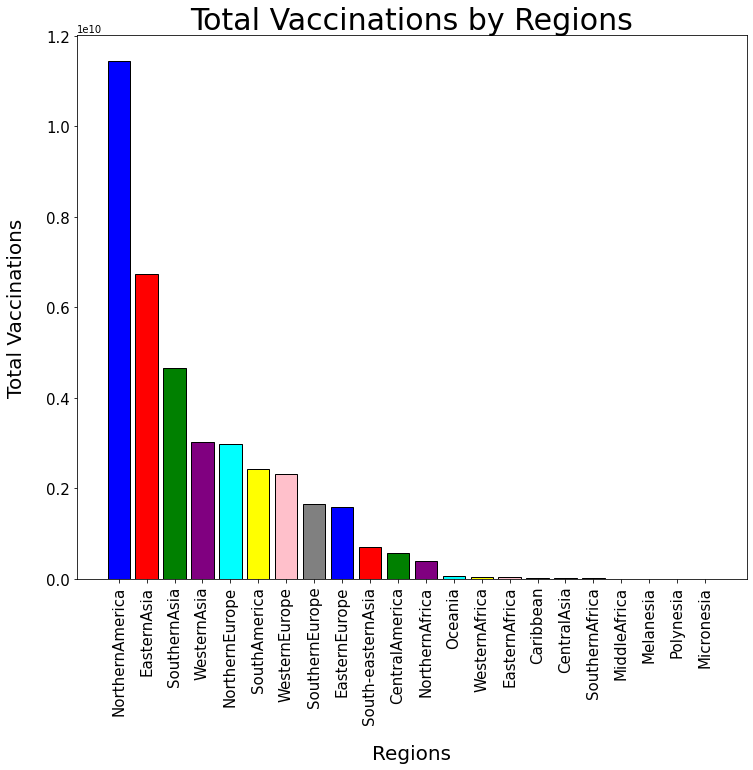

Text(0.5, 1.0, 'Total Vaccinations by Regions')

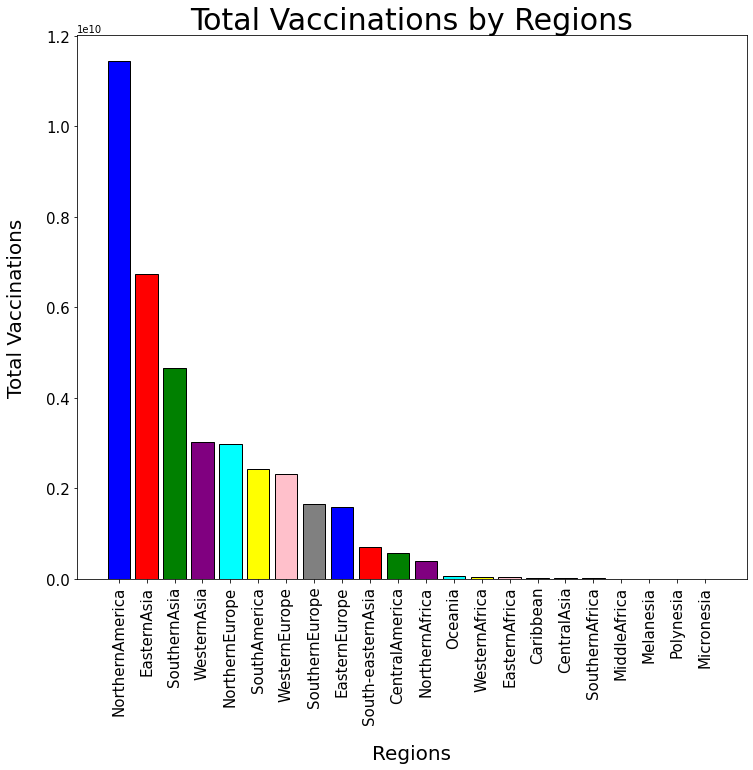

In [15]:
plt.rcParams['figure.figsize'] = (12, 10)
fig, ax = plt.subplots()
bars = ax.bar(x=region_grpd_sorted['Region'] , height=region_grpd_sorted['total_vaccinations'], color=['blue', 'red', 'green', 'purple', 'cyan', 'yellow','pink', 'grey'],edgecolor='black', width=0.8, tick_label= None)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15 , rotation = 90)
plt.xlabel('Regions' ,labelpad= 20, loc = 'center' ,fontsize = 20)
plt.ylabel('Total Vaccinations' ,labelpad= 20, loc = 'center', fontsize = 20)
plt.title('Total Vaccinations by Regions', fontsize = 30 )

In [16]:
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
bar_color = bars[0].get_facecolor()
fig.tight_layout()

In [17]:
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
world_geo = r'world_countries.json'
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=vacc_region_remerge,
    columns=['country', 'total_vaccinations'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Vaccinations')

world_map

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
demographics = pd.merge(vacc_region_remerge[['country','total_vaccinations']], df_country_variables[
    ['country','Region', 'Population in thousands (2017)', 'Sex ratio (m per 100 f, 2017)',
     'GDP per capita (current US$)', 'Health: Total expenditure (% of GDP)']], left_on='country',right_on='country', how='outer').dropna()
demographics

country  total_vaccinations             Region  \
0                         Afghanistan        4.222000e+05       SouthernAsia   
1                             Albania        8.712987e+06     SouthernEurope   
2                             Algeria        7.503000e+04     NorthernAfrica   
3                             Andorra        1.280360e+05     SouthernEurope   
4                              Angola        1.551757e+06       MiddleAfrica   
5                            Anguilla        3.581300e+04          Caribbean   
6                 Antigua and Barbuda        2.445320e+05          Caribbean   
7                           Argentina        2.644366e+08       SouthAmerica   
8                             Armenia        5.650000e+02        WesternAsia   
9                               Aruba        1.097850e+06          Caribbean   
10                          Australia        4.776510e+07            Oceania   
11                            Austria        1.215548e+08      WesternEurope   
12                         Azerbaijan        3.972762e+07        WesternAsia   
13                            Bahamas        7.970900e+04          Caribbean   
14                            Bahrain        4.701133e+07        WesternAsia   
15                         Bangladesh        2.196219e+08       SouthernAsia   
16                           Barbados        3.188134e+06          Caribbean   
17                            Belarus        5.651060e+05      EasternEurope   
18                            Belgium        1.469281e+08      WesternEurope   
19                             Belize        5.846220e+05     CentralAmerica   
20                            Bermuda        4.502020e+05    NorthernAmerica   
21                             Bhutan        1.501612e+07       SouthernAsia   
22             Bosnia and Herzegovina        1.500000e+04     SouthernEurope   
23                           Botswana        1.812170e+05     SouthernAfrica   
24                             Brazil        1.279594e+09       SouthAmerica   
25                           Bulgaria        3.224480e+07      EasternEurope   
26                           Cambodia        5.152603e+07  South-easternAsia   
27                           Cameroon        4.000000e+02       MiddleAfrica   
28                             Canada        4.310686e+08    NorthernAmerica   
29                     Cayman Islands        1.178565e+06          Caribbean   
30                              Chile        6.341024e+08       SouthAmerica   
31                              China        6.679482e+09        EasternAsia   
32                           Colombia        1.186463e+08       SouthAmerica   
33                              Congo        1.429700e+04       MiddleAfrica   
34                         Costa Rica        5.136816e+06     CentralAmerica   
35                            Croatia        2.287102e+07     SouthernEurope   
36                             Cyprus        2.619462e+06        WesternAsia   
37                            Czechia        1.227962e+08      EasternEurope   
38                            Denmark        8.771947e+07     NorthernEurope   
39                           Djibouti        1.024600e+04      EasternAfrica   
40                           Dominica        2.223460e+05          Caribbean   
41                 Dominican Republic        1.451981e+07          Caribbean   
42                            Ecuador        1.347511e+07       SouthAmerica   
43                              Egypt        8.258490e+05     NorthernAfrica   
44                        El Salvador        8.340455e+06     CentralAmerica   
45                  Equatorial Guinea        2.424420e+05       MiddleAfrica   
46                            Estonia        1.909721e+07     NorthernEurope   
47                           Ethiopia        4.300000e+05      EasternAfrica   
48                      Faroe Islands        3.369000e+05     NorthernEurope   
49                            

country  total_vaccinations             Region  \
0                         Afghanistan        4.222000e+05       SouthernAsia   
1                             Albania        8.712987e+06     SouthernEurope   
2                             Algeria        7.503000e+04     NorthernAfrica   
3                             Andorra        1.280360e+05     SouthernEurope   
4                              Angola        1.551757e+06       MiddleAfrica   
5                            Anguilla        3.581300e+04          Caribbean   
6                 Antigua and Barbuda        2.445320e+05          Caribbean   
7                           Argentina        2.644366e+08       SouthAmerica   
8                             Armenia        5.650000e+02        WesternAsia   
9                               Aruba        1.097850e+06          Caribbean   
10                          Australia        4.776510e+07            Oceania   
11                            Austria        1.215548e+08      WesternEurope   
12                         Azerbaijan        3.972762e+07        WesternAsia   
13                            Bahamas        7.970900e+04          Caribbean   
14                            Bahrain        4.701133e+07        WesternAsia   
15                         Bangladesh        2.196219e+08       SouthernAsia   
16                           Barbados        3.188134e+06          Caribbean   
17                            Belarus        5.651060e+05      EasternEurope   
18                            Belgium        1.469281e+08      WesternEurope   
19                             Belize        5.846220e+05     CentralAmerica   
20                            Bermuda        4.502020e+05    NorthernAmerica   
21                             Bhutan        1.501612e+07       SouthernAsia   
22             Bosnia and Herzegovina        1.500000e+04     SouthernEurope   
23                           Botswana        1.812170e+05     SouthernAfrica   
24                             Brazil        1.279594e+09       SouthAmerica   
25                           Bulgaria        3.224480e+07      EasternEurope   
26                           Cambodia        5.152603e+07  South-easternAsia   
27                           Cameroon        4.000000e+02       MiddleAfrica   
28                             Canada        4.310686e+08    NorthernAmerica   
29                     Cayman Islands        1.178565e+06          Caribbean   
30                              Chile        6.341024e+08       SouthAmerica   
31                              China        6.679482e+09        EasternAsia   
32                           Colombia        1.186463e+08       SouthAmerica   
33                              Congo        1.429700e+04       MiddleAfrica   
34                         Costa Rica        5.136816e+06     CentralAmerica   
35                            Croatia        2.287102e+07     SouthernEurope   
36                             Cyprus        2.619462e+06        WesternAsia   
37                            Czechia        1.227962e+08      EasternEurope   
38                            Denmark        8.771947e+07     NorthernEurope   
39                           Djibouti        1.024600e+04      EasternAfrica   
40                           Dominica        2.223460e+05          Caribbean   
41                 Dominican Republic        1.451981e+07          Caribbean   
42                            Ecuador        1.347511e+07       SouthAmerica   
43                              Egypt        8.258490e+05     NorthernAfrica   
44                        El Salvador        8.340455e+06     CentralAmerica   
45                  Equatorial Guinea        2.424420e+05       MiddleAfrica   
46                            Estonia        1.909721e+07     NorthernEurope   
47                           Ethiopia        4.300000e+05      EasternAfrica   
48                      Faroe Islands        3.369000e+05     NorthernEurope   
49                            

In [19]:
demographics.replace(['-99', -99 ], np.nan, inplace=True)
demographics.isnull().sum()

country                                  0
total_vaccinations                       0
Region                                   0
Population in thousands (2017)           0
Sex ratio (m per 100 f, 2017)            1
GDP per capita (current US$)             4
Health: Total expenditure (% of GDP)    14
dtype: int64

country                                  0
total_vaccinations                       0
Region                                   0
Population in thousands (2017)           0
Sex ratio (m per 100 f, 2017)            1
GDP per capita (current US$)             4
Health: Total expenditure (% of GDP)    14
dtype: int64

In [20]:
demographics ['estimated_fully_vaccinated_people'] = (demographics ['total_vaccinations']/2)

In [21]:
demographics['percent of vaccination to population (%)'] = (demographics['estimated_fully_vaccinated_people'] / demographics['Population in thousands (2017)'])/10
demographics['male percentage of population (%)'] = (demographics['Sex ratio (m per 100 f, 2017)'] / (demographics['Sex ratio (m per 100 f, 2017)'] + 100))*100
demographics['female percentage of population (%)'] = (100- (demographics['male percentage of population (%)']))
demographics['vaccinated_males'] = ((demographics['estimated_fully_vaccinated_people']) * (demographics['male percentage of population (%)']))
demographics['vaccinated_females'] = ((demographics['estimated_fully_vaccinated_people']) * (demographics['female percentage of population (%)']))

In [22]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
demographics

country  total_vaccinations             Region  \
0                         Afghanistan        4.222000e+05       SouthernAsia   
1                             Albania        8.712987e+06     SouthernEurope   
2                             Algeria        7.503000e+04     NorthernAfrica   
3                             Andorra        1.280360e+05     SouthernEurope   
4                              Angola        1.551757e+06       MiddleAfrica   
5                            Anguilla        3.581300e+04          Caribbean   
6                 Antigua and Barbuda        2.445320e+05          Caribbean   
7                           Argentina        2.644366e+08       SouthAmerica   
8                             Armenia        5.650000e+02        WesternAsia   
9                               Aruba        1.097850e+06          Caribbean   
10                          Australia        4.776510e+07            Oceania   
11                            Austria        1.215548e+08      WesternEurope   
12                         Azerbaijan        3.972762e+07        WesternAsia   
13                            Bahamas        7.970900e+04          Caribbean   
14                            Bahrain        4.701133e+07        WesternAsia   
15                         Bangladesh        2.196219e+08       SouthernAsia   
16                           Barbados        3.188134e+06          Caribbean   
17                            Belarus        5.651060e+05      EasternEurope   
18                            Belgium        1.469281e+08      WesternEurope   
19                             Belize        5.846220e+05     CentralAmerica   
20                            Bermuda        4.502020e+05    NorthernAmerica   
21                             Bhutan        1.501612e+07       SouthernAsia   
22             Bosnia and Herzegovina        1.500000e+04     SouthernEurope   
23                           Botswana        1.812170e+05     SouthernAfrica   
24                             Brazil        1.279594e+09       SouthAmerica   
25                           Bulgaria        3.224480e+07      EasternEurope   
26                           Cambodia        5.152603e+07  South-easternAsia   
27                           Cameroon        4.000000e+02       MiddleAfrica   
28                             Canada        4.310686e+08    NorthernAmerica   
29                     Cayman Islands        1.178565e+06          Caribbean   
30                              Chile        6.341024e+08       SouthAmerica   
31                              China        6.679482e+09        EasternAsia   
32                           Colombia        1.186463e+08       SouthAmerica   
33                              Congo        1.429700e+04       MiddleAfrica   
34                         Costa Rica        5.136816e+06     CentralAmerica   
35                            Croatia        2.287102e+07     SouthernEurope   
36                             Cyprus        2.619462e+06        WesternAsia   
37                            Czechia        1.227962e+08      EasternEurope   
38                            Denmark        8.771947e+07     NorthernEurope   
39                           Djibouti        1.024600e+04      EasternAfrica   
40                           Dominica        2.223460e+05          Caribbean   
41                 Dominican Republic        1.451981e+07          Caribbean   
42                            Ecuador        1.347511e+07       SouthAmerica   
43                              Egypt        8.258490e+05     NorthernAfrica   
44                        El Salvador        8.340455e+06     CentralAmerica   
45                  Equatorial Guinea        2.424420e+05       MiddleAfrica   
46                            Estonia        1.909721e+07     NorthernEurope   
47                           Ethiopia        4.300000e+05      EasternAfrica   
48                      Faroe Islands        3.369000e+05     NorthernEurope   
49                            

country  total_vaccinations             Region  \
0                         Afghanistan        4.222000e+05       SouthernAsia   
1                             Albania        8.712987e+06     SouthernEurope   
2                             Algeria        7.503000e+04     NorthernAfrica   
3                             Andorra        1.280360e+05     SouthernEurope   
4                              Angola        1.551757e+06       MiddleAfrica   
5                            Anguilla        3.581300e+04          Caribbean   
6                 Antigua and Barbuda        2.445320e+05          Caribbean   
7                           Argentina        2.644366e+08       SouthAmerica   
8                             Armenia        5.650000e+02        WesternAsia   
9                               Aruba        1.097850e+06          Caribbean   
10                          Australia        4.776510e+07            Oceania   
11                            Austria        1.215548e+08      WesternEurope   
12                         Azerbaijan        3.972762e+07        WesternAsia   
13                            Bahamas        7.970900e+04          Caribbean   
14                            Bahrain        4.701133e+07        WesternAsia   
15                         Bangladesh        2.196219e+08       SouthernAsia   
16                           Barbados        3.188134e+06          Caribbean   
17                            Belarus        5.651060e+05      EasternEurope   
18                            Belgium        1.469281e+08      WesternEurope   
19                             Belize        5.846220e+05     CentralAmerica   
20                            Bermuda        4.502020e+05    NorthernAmerica   
21                             Bhutan        1.501612e+07       SouthernAsia   
22             Bosnia and Herzegovina        1.500000e+04     SouthernEurope   
23                           Botswana        1.812170e+05     SouthernAfrica   
24                             Brazil        1.279594e+09       SouthAmerica   
25                           Bulgaria        3.224480e+07      EasternEurope   
26                           Cambodia        5.152603e+07  South-easternAsia   
27                           Cameroon        4.000000e+02       MiddleAfrica   
28                             Canada        4.310686e+08    NorthernAmerica   
29                     Cayman Islands        1.178565e+06          Caribbean   
30                              Chile        6.341024e+08       SouthAmerica   
31                              China        6.679482e+09        EasternAsia   
32                           Colombia        1.186463e+08       SouthAmerica   
33                              Congo        1.429700e+04       MiddleAfrica   
34                         Costa Rica        5.136816e+06     CentralAmerica   
35                            Croatia        2.287102e+07     SouthernEurope   
36                             Cyprus        2.619462e+06        WesternAsia   
37                            Czechia        1.227962e+08      EasternEurope   
38                            Denmark        8.771947e+07     NorthernEurope   
39                           Djibouti        1.024600e+04      EasternAfrica   
40                           Dominica        2.223460e+05          Caribbean   
41                 Dominican Republic        1.451981e+07          Caribbean   
42                            Ecuador        1.347511e+07       SouthAmerica   
43                              Egypt        8.258490e+05     NorthernAfrica   
44                        El Salvador        8.340455e+06     CentralAmerica   
45                  Equatorial Guinea        2.424420e+05       MiddleAfrica   
46                            Estonia        1.909721e+07     NorthernEurope   
47                           Ethiopia        4.300000e+05      EasternAfrica   
48                      Faroe Islands        3.369000e+05     NorthernEurope   
49                            

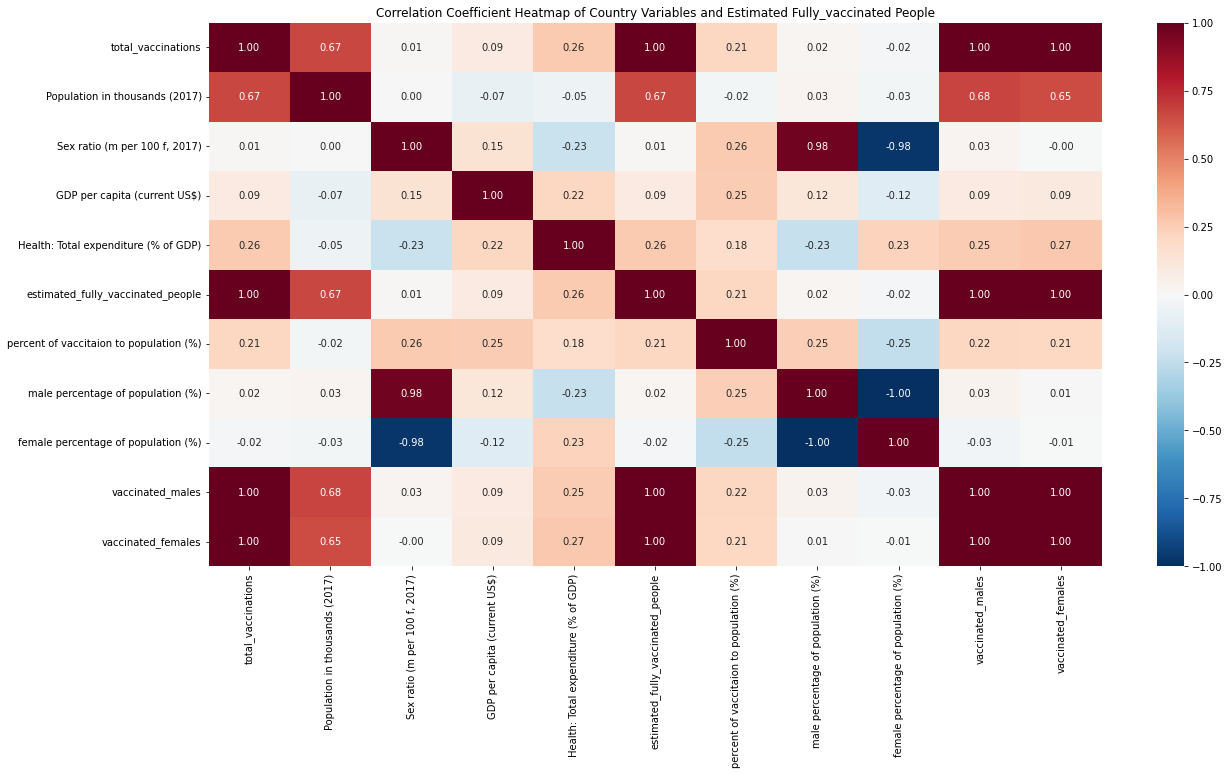

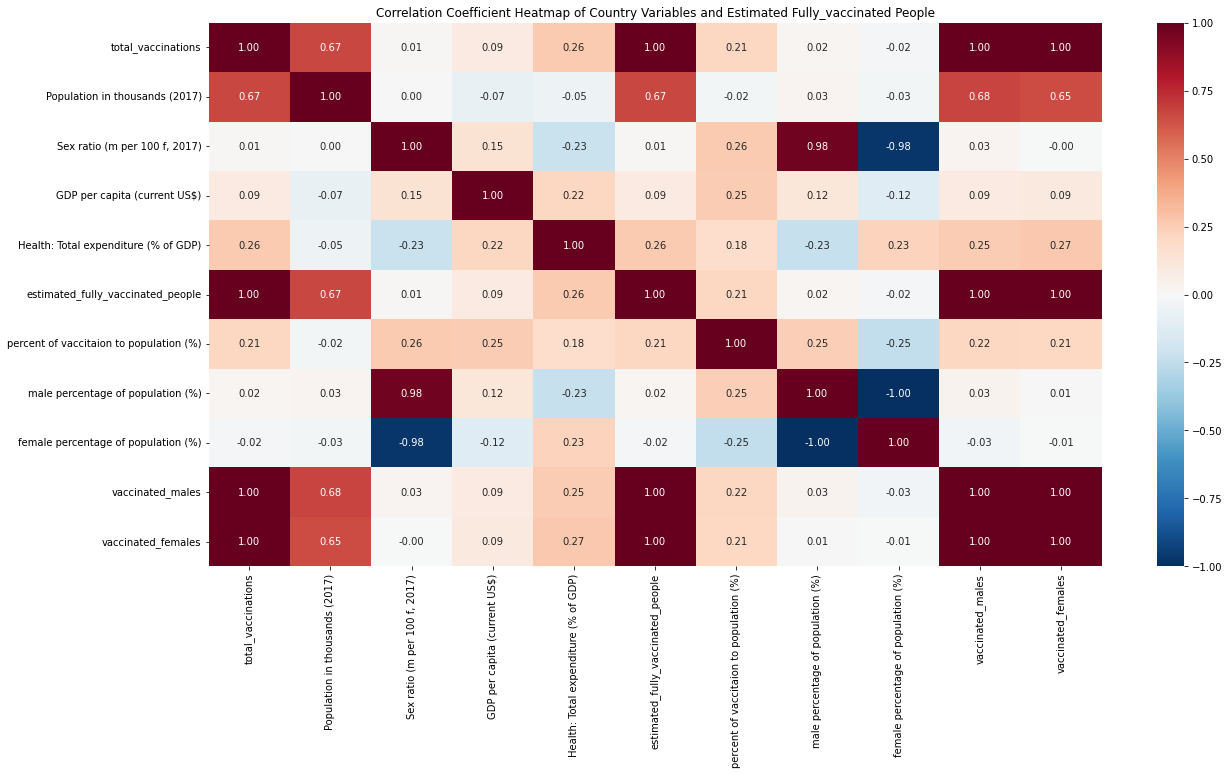

In [23]:
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(demographics.interpolate(limit_area='inside').dropna(axis=0, inplace=False).corr(), cmap="RdBu_r", annot=True, fmt=".2f")
ax.set_title('Correlation Coefficient Heatmap of Country Variables and Estimated Fully_vaccinated People')
plt.show()

In [24]:
countries_over_100 = demographics[demographics['percent of vaccination to population (%)'] >= 100]
countries_under_100 = demographics[demographics['percent of vaccination to population (%)'] <= 100]

In [25]:
countries_over_100['country'].to_frame()

country
1                     Albania
5                    Anguilla
6         Antigua and Barbuda
7                   Argentina
9                       Aruba
11                    Austria
12                 Azerbaijan
14                    Bahrain
16                   Barbados
18                    Belgium
20                    Bermuda
21                     Bhutan
24                     Brazil
25                   Bulgaria
26                   Cambodia
28                     Canada
29             Cayman Islands
30                      Chile
31                      China
32                   Colombia
35                    Croatia
36                     Cyprus
37                    Czechia
38                    Denmark
40                   Dominica
46                    Estonia
48              Faroe Islands
50                    Finland
51                     France
55                    Germany
57                  Gibraltar
58                     Greece
59                  Greenland
65                    Hungary
66                    Iceland
67                      India
68                  Indonesia
70                    Ireland
71                Isle of Man
72                     Israel
73                      Italy
81                     Latvia
85              Liechtenstein
86                  Lithuania
87                 Luxembourg
90                   Maldives
92                      Malta
95                     Mexico
96                     Monaco
97                   Mongolia
98                 Montenegro
100                   Morocco
106               Netherlands
111                    Norway
114                    Panama
119                    Poland
120                  Portugal
121                     Qatar
122                   Romania
123        Russian Federation
125              Saint Helena
127               Saint Lucia
129                San Marino
131              Saudi Arabia
133                    Serbia
134                Seychelles
136                 Singapore
137                  Slovakia
138                  Slovenia
143                     Spain
147                    Sweden
148               Switzerland
154                    Turkey
158      United Arab Emirates
159            United Kingdom
160  United States of America
161                   Uruguay

country
1                     Albania
5                    Anguilla
6         Antigua and Barbuda
7                   Argentina
9                       Aruba
11                    Austria
12                 Azerbaijan
14                    Bahrain
16                   Barbados
18                    Belgium
20                    Bermuda
21                     Bhutan
24                     Brazil
25                   Bulgaria
26                   Cambodia
28                     Canada
29             Cayman Islands
30                      Chile
31                      China
32                   Colombia
35                    Croatia
36                     Cyprus
37                    Czechia
38                    Denmark
40                   Dominica
46                    Estonia
48              Faroe Islands
50                    Finland
51                     France
55                    Germany
57                  Gibraltar
58                     Greece
59                  Greenland
65                    Hungary
66                    Iceland
67                      India
68                  Indonesia
70                    Ireland
71                Isle of Man
72                     Israel
73                      Italy
81                     Latvia
85              Liechtenstein
86                  Lithuania
87                 Luxembourg
90                   Maldives
92                      Malta
95                     Mexico
96                     Monaco
97                   Mongolia
98                 Montenegro
100                   Morocco
106               Netherlands
111                    Norway
114                    Panama
119                    Poland
120                  Portugal
121                     Qatar
122                   Romania
123        Russian Federation
125              Saint Helena
127               Saint Lucia
129                San Marino
131              Saudi Arabia
133                    Serbia
134                Seychelles
136                 Singapore
137                  Slovakia
138                  Slovenia
143                     Spain
147                    Sweden
148               Switzerland
154                    Turkey
158      United Arab Emirates
159            United Kingdom
160  United States of America
161                   Uruguay

<AxesSubplot:>

<AxesSubplot:>

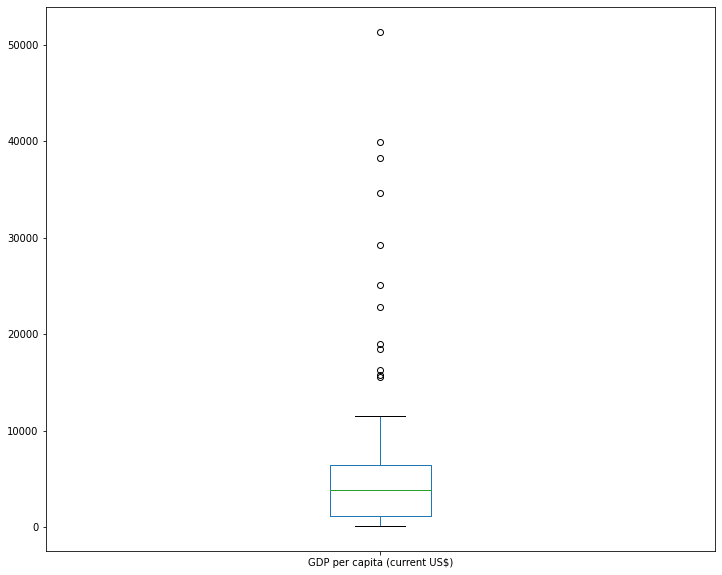

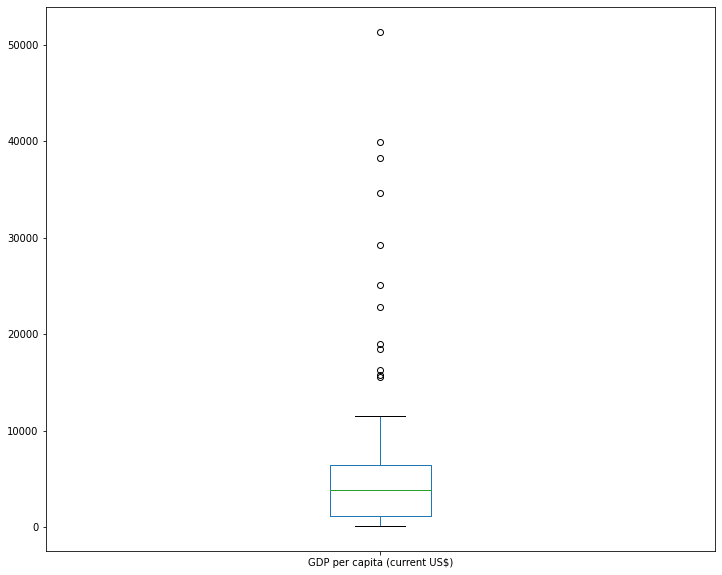

In [26]:
countries_under_100.boxplot(column =['GDP per capita (current US$)'], grid = False)

In [27]:
countries_under_100['GDP per capita (current US$)'][countries_under_100['GDP per capita (current US$)']>80000] = np.nan
countries_under_100.dropna( axis=0, inplace=True)

In [28]:
countries_under_100[["GDP per capita (current US$)", "percent of vaccination to population (%)"]].corr()

GDP per capita (current US$)  \
GDP per capita (current US$)                                 1.000000   
percent of vaccitaion to population (%)                      0.458985   

                                         percent of vaccitaion to population (%)  
GDP per capita (current US$)                                            0.458985  
percent of vaccitaion to population (%)                                 1.000000

GDP per capita (current US$)  \
GDP per capita (current US$)                                 1.000000   
percent of vaccitaion to population (%)                      0.458985   

                                         percent of vaccitaion to population (%)  
GDP per capita (current US$)                                            0.458985  
percent of vaccitaion to population (%)                                 1.000000

(0.0, 109.66634173125775)

(0.0, 109.66634173125775)

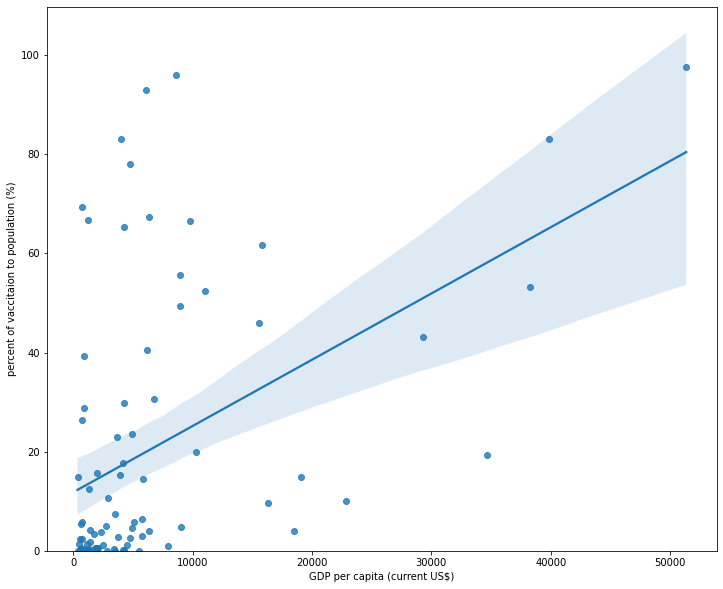

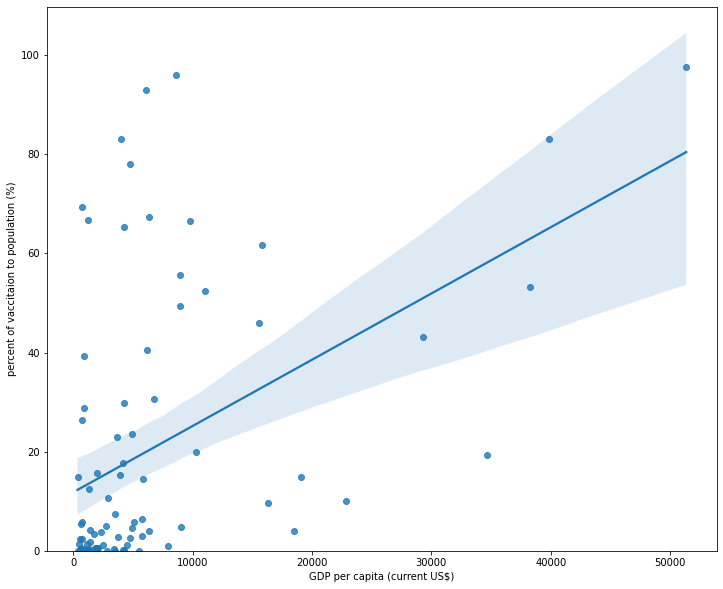

In [29]:
sns.regplot(x="GDP per capita (current US$)", y="percent of vaccination to population (%)", data= countries_under_100)
plt.ylim(0,)

In [30]:
countries_under_100[["Health: Total expenditure (% of GDP)", "percent of vaccination to population (%)"]].corr()

Health: Total expenditure (% of GDP)  \
Health: Total expenditure (% of GDP)                                 1.000000   
percent of vaccitaion to population (%)                              0.019329   

                                         percent of vaccitaion to population (%)  
Health: Total expenditure (% of GDP)                                    0.019329  
percent of vaccitaion to population (%)                                 1.000000

Health: Total expenditure (% of GDP)  \
Health: Total expenditure (% of GDP)                                 1.000000   
percent of vaccitaion to population (%)                              0.019329   

                                         percent of vaccitaion to population (%)  
Health: Total expenditure (% of GDP)                                    0.019329  
percent of vaccitaion to population (%)                                 1.000000

(0.0, 102.55886194820124)

(0.0, 102.55886194820124)

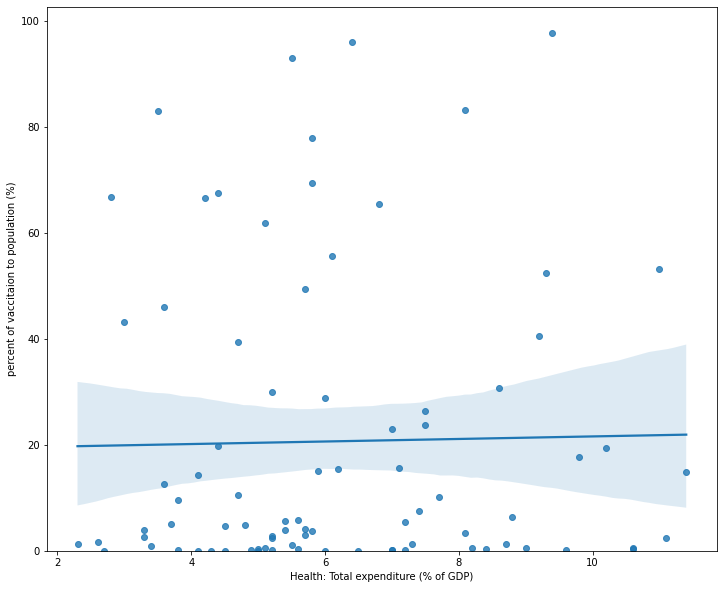

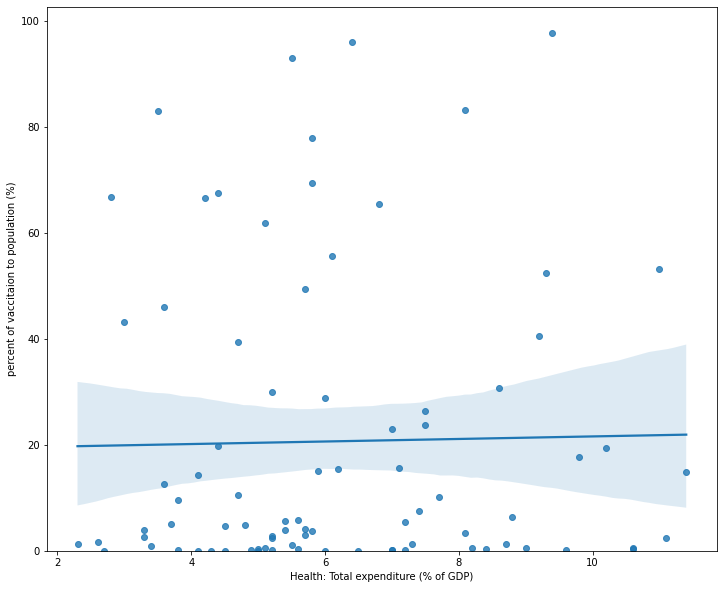

In [31]:
sns.regplot(x="Health: Total expenditure (% of GDP)", y="percent of vaccination to population (%)", data= countries_under_100)
plt.ylim(0,)

In [32]:
demographics_regs = demographics.groupby(['Region'],as_index=False).mean()
regs_under_100 = demographics_regs[demographics_regs['percent of vaccination to population (%)'] <= 100]
regs_under_100_sorted = regs_under_100.sort_values( by = 'percent of vaccination to population (%)', ascending = False)
regs_under_100_sorted

Region  total_vaccinations  Population in thousands (2017)  \
9      NorthernAfrica        6.645278e+07                    38841.833333   
1      CentralAmerica        7.203838e+07                    22164.750000   
12            Oceania        2.638633e+07                    14578.500000   
14  South-easternAsia        9.893462e+07                    77808.000000   
19      WesternAfrica        3.750223e+06                    28198.818182   
2         CentralAsia        3.201956e+06                    18720.000000   
7          Micronesia        8.680000e+02                       11.000000   
16     SouthernAfrica        1.909145e+06                    15944.000000   
8        MiddleAfrica        3.096885e+05                    10432.666667   
13          Polynesia        5.867000e+03                      108.000000   
6           Melanesia        3.160867e+04                     3256.000000   

    Sex ratio (m per 100 f, 2017)  GDP per capita (current US$)  \
9                      100.266667                   3608.633333   
1                       97.612500                   6348.137500   
12                      98.000000                  44823.250000   
14                      99.014286                  10913.300000   
19                      99.710000                    974.080000   
2                       97.233333                   4575.600000   
7                      101.900000                  18469.200000   
16                      95.800000                   4436.950000   
8                      104.216667                   5637.850000   
13                     100.700000                   3784.500000   
6                      103.333333                   3187.033333   

    Health: Total expenditure (% of GDP)  estimated_fully_vaccinated_people  \
9                               6.516667                       3.322639e+07   
1                               7.512500                       3.601919e+07   
12                             10.200000                       1.319317e+07   
14                              4.100000                       4.946731e+07   
19                              5.800000                       1.875111e+06   
2                               5.566667                       1.600978e+06   
7                               3.300000                       4.340000e+02   
16                              8.266667                       9.545725e+05   
8                               4.650000                       1.548442e+05   
13                              5.200000                       2.933500e+03   
6                               4.633333                       1.580433e+04   

    percent of vaccitaion to population (%)  \
9                                 95.418781   
1                                 80.827842   
12                                75.439602   
14                                67.354613   
19                                23.057455   
2                                  7.864245   
7                                  3.945455   
16                                 3.264760   
8                                  2.755761   
13                                 2.716204   
6                                  1.736317   

    male percentage of population (%)  female percentage of population (%)  \
9                           50.062179                            49.937821   
1                           49.378149                            50.621851   
12                          49.492772                            50.507228   
14                          49.732258                            50.267742   
19                          49.923651                            50.076349   
2                           49.291116                            50.708884   
7                           50.470530                            49.529470   
16                          48.925104                            51.074896   
8                           50.937458                            49.0

Region  total_vaccinations  Population in thousands (2017)  \
9      NorthernAfrica        6.645278e+07                    38841.833333   
1      CentralAmerica        7.203838e+07                    22164.750000   
12            Oceania        2.638633e+07                    14578.500000   
14  South-easternAsia        9.893462e+07                    77808.000000   
19      WesternAfrica        3.750223e+06                    28198.818182   
2         CentralAsia        3.201956e+06                    18720.000000   
7          Micronesia        8.680000e+02                       11.000000   
16     SouthernAfrica        1.909145e+06                    15944.000000   
8        MiddleAfrica        3.096885e+05                    10432.666667   
13          Polynesia        5.867000e+03                      108.000000   
6           Melanesia        3.160867e+04                     3256.000000   

    Sex ratio (m per 100 f, 2017)  GDP per capita (current US$)  \
9                      100.266667                   3608.633333   
1                       97.612500                   6348.137500   
12                      98.000000                  44823.250000   
14                      99.014286                  10913.300000   
19                      99.710000                    974.080000   
2                       97.233333                   4575.600000   
7                      101.900000                  18469.200000   
16                      95.800000                   4436.950000   
8                      104.216667                   5637.850000   
13                     100.700000                   3784.500000   
6                      103.333333                   3187.033333   

    Health: Total expenditure (% of GDP)  estimated_fully_vaccinated_people  \
9                               6.516667                       3.322639e+07   
1                               7.512500                       3.601919e+07   
12                             10.200000                       1.319317e+07   
14                              4.100000                       4.946731e+07   
19                              5.800000                       1.875111e+06   
2                               5.566667                       1.600978e+06   
7                               3.300000                       4.340000e+02   
16                              8.266667                       9.545725e+05   
8                               4.650000                       1.548442e+05   
13                              5.200000                       2.933500e+03   
6                               4.633333                       1.580433e+04   

    percent of vaccitaion to population (%)  \
9                                 95.418781   
1                                 80.827842   
12                                75.439602   
14                                67.354613   
19                                23.057455   
2                                  7.864245   
7                                  3.945455   
16                                 3.264760   
8                                  2.755761   
13                                 2.716204   
6                                  1.736317   

    male percentage of population (%)  female percentage of population (%)  \
9                           50.062179                            49.937821   
1                           49.378149                            50.621851   
12                          49.492772                            50.507228   
14                          49.732258                            50.267742   
19                          49.923651                            50.076349   
2                           49.291116                            50.708884   
7                           50.470530                            49.529470   
16                          48.925104                            51.074896   
8                           50.937458                            49.0

Text(0.5, 1.0, 'The Percentage of Fully-Vaccinatated People to Population by Regions')

Text(0.5, 1.0, 'The Percentage of Fully-Vaccinatated People to Population by Regions')

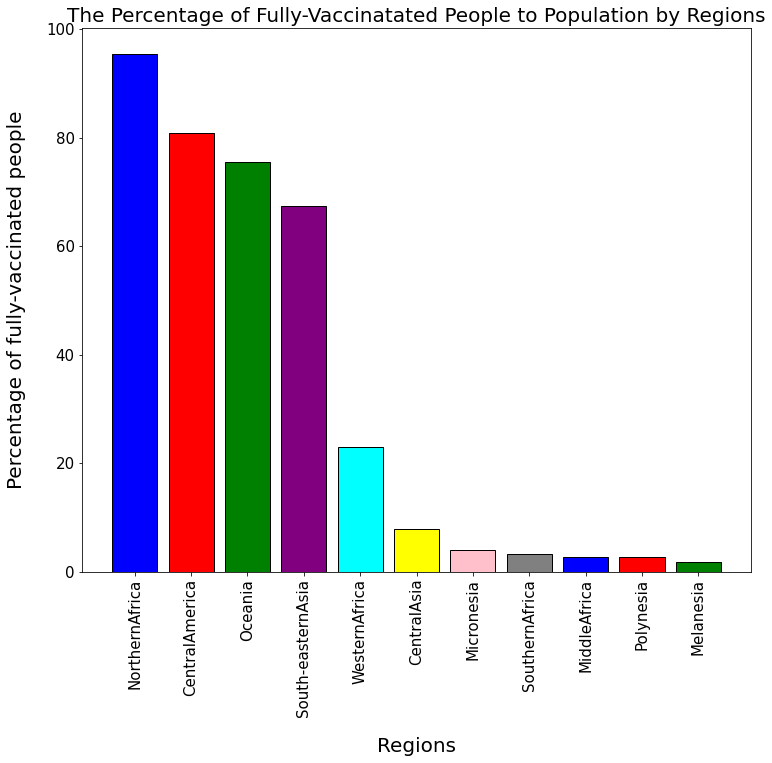

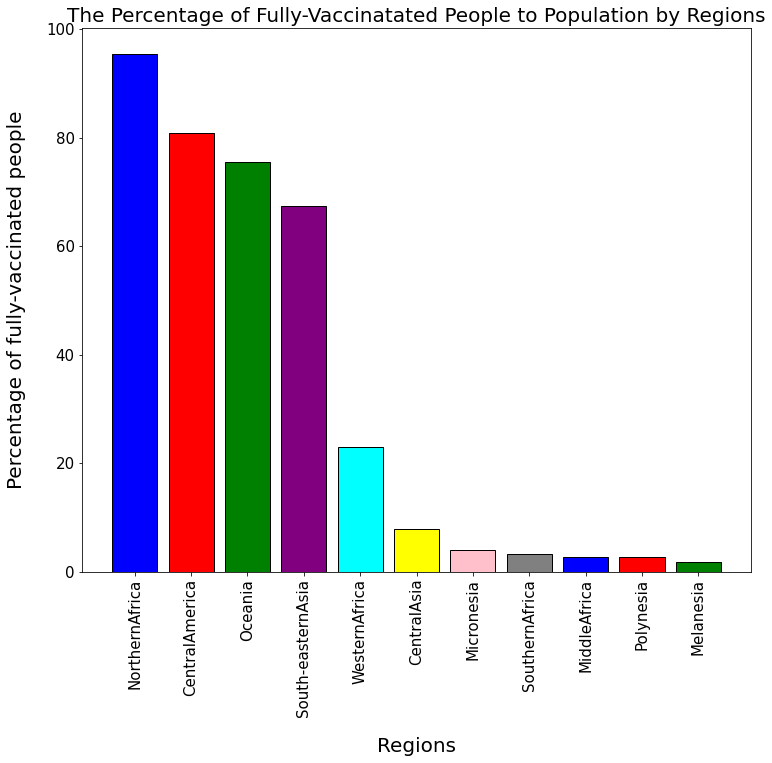

In [33]:
plt.rcParams['figure.figsize'] = (12, 10)
fig, ax = plt.subplots()
bars = ax.bar(x=regs_under_100_sorted['Region'] , height=regs_under_100_sorted['percent of vaccination to population (%)'], color=['blue', 'red', 'green', 'purple', 'cyan', 'yellow','pink', 'grey'],edgecolor='black', width=0.8, tick_label= None)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15 , rotation = 90)
plt.xlabel('Regions' ,labelpad= 20, loc = 'center' ,fontsize = 20)
plt.ylabel('Percentage of fully-vaccinated people' ,labelpad= 20, loc = 'center', fontsize = 20)
plt.title('The Percentage of Fully-Vaccinatated People to Population by Regions', fontsize = 20)

In [34]:
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
bar_color = bars[0].get_facecolor()
fig.tight_layout()

In [35]:
CPI2020.head()

Country ISO3 Region  CPI score 2020  Rank  Standard error  \
0      Denmark  DNK  WE/EU              88     1        1.775809   
1  New Zealand  NZL     AP              88     1        1.479342   
2      Finland  FIN  WE/EU              85     3        1.748594   
3    Singapore  SGP     AP              85     3        1.203239   
4       Sweden  SWE  WE/EU              85     3        1.303953   

   Number of sources  Lower CI  Upper CI  African Development Bank CPIA  \
0                  8  85.08767  90.91233                            NaN   
1                  8  85.57388  90.42612                            NaN   
2                  8  82.13231  87.86769                            NaN   
3                  9  83.02669  86.97331                            NaN   
4                  8  82.86152  87.13848                            NaN   

   Bertelsmann Foundation Sustainable Governance Index  \
0                                               97.0     
1                                               97.0     
2                                               88.0     
3                                                NaN     
4                                               88.0     

   Bertelsmann Foundation Transformation Index  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                         73.0   
4                                          NaN   

   Economist Intelligence Unit Country Ratings  \
0                                         90.0   
1                                         90.0   
2                                         72.0   
3                                         90.0   
4                                         90.0   

   Freedom House Nations in Transit  Global Insight Country Risk Ratings  \
0                               NaN                                   83   
1                               NaN                                   83   
2                               NaN                                   83   
3                               NaN                                   83   
4                               NaN                                   83   

   IMD World Competitiveness Yearbook  PERC Asia Risk Guide  \
0                                94.0                   NaN   
1                                92.0                   NaN   
2                                91.0                   NaN   
3                                91.0                  90.0   
4                                84.0                   NaN   

   PRS International Country Risk Guide  Varieties of Democracy Project  \
0                                  98.0                            78.0   
1                                  93.0                            77.0   
2                                  93.0                            77.0   
3                                  85.0                            77.0   
4                                  93.0                            77.0   

   World Bank CPIA  World Economic Forum EOS  \
0              NaN                      79.0   
1              NaN                      89.0   
2              NaN                      93.0   
3              NaN                      89.0   
4              NaN                      77.0   

   World Justice Project Rule of Law Index  
0                                     86.0  
1                                     82.0  
2                                     86.0  
3                                     85.0  
4                                     87.0

Country ISO3 Region  CPI score 2020  Rank  Standard error  \
0      Denmark  DNK  WE/EU              88     1        1.775809   
1  New Zealand  NZL     AP              88     1        1.479342   
2      Finland  FIN  WE/EU              85     3        1.748594   
3    Singapore  SGP     AP              85     3        1.203239   
4       Sweden  SWE  WE/EU              85     3        1.303953   

   Number of sources  Lower CI  Upper CI  African Development Bank CPIA  \
0                  8  85.08767  90.91233                            NaN   
1                  8  85.57388  90.42612                            NaN   
2                  8  82.13231  87.86769                            NaN   
3                  9  83.02669  86.97331                            NaN   
4                  8  82.86152  87.13848                            NaN   

   Bertelsmann Foundation Sustainable Governance Index  \
0                                               97.0     
1                                               97.0     
2                                               88.0     
3                                                NaN     
4                                               88.0     

   Bertelsmann Foundation Transformation Index  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                         73.0   
4                                          NaN   

   Economist Intelligence Unit Country Ratings  \
0                                         90.0   
1                                         90.0   
2                                         72.0   
3                                         90.0   
4                                         90.0   

   Freedom House Nations in Transit  Global Insight Country Risk Ratings  \
0                               NaN                                   83   
1                               NaN                                   83   
2                               NaN                                   83   
3                               NaN                                   83   
4                               NaN                                   83   

   IMD World Competitiveness Yearbook  PERC Asia Risk Guide  \
0                                94.0                   NaN   
1                                92.0                   NaN   
2                                91.0                   NaN   
3                                91.0                  90.0   
4                                84.0                   NaN   

   PRS International Country Risk Guide  Varieties of Democracy Project  \
0                                  98.0                            78.0   
1                                  93.0                            77.0   
2                                  93.0                            77.0   
3                                  85.0                            77.0   
4                                  93.0                            77.0   

   World Bank CPIA  World Economic Forum EOS  \
0              NaN                      79.0   
1              NaN                      89.0   
2              NaN                      93.0   
3              NaN                      89.0   
4              NaN                      77.0   

   World Justice Project Rule of Law Index  
0                                     86.0  
1                                     82.0  
2                                     86.0  
3                                     85.0  
4                                     87.0

In [36]:
CPI_vs_vac = pd.merge(countries_under_100[['country','percent of vaccination to population (%)']], CPI2020[['Country', 'CPI score 2020']], left_on='country',right_on='Country', how='outer').dropna()
CPI_vs_vac

country  percent of vaccitaion to population (%)  \
0                        Afghanistan                                 0.594146   
1                            Algeria                                 0.090796   
3                             Angola                                 2.605018   
4                            Armenia                                 0.009642   
5                          Australia                                97.675146   
6                            Bahamas                                10.089747   
7                         Bangladesh                                66.685453   
8                            Belarus                                 2.984294   
10            Bosnia and Herzegovina                                 0.213858   
11                          Botswana                                 3.953250   
12                          Cameroon                                 0.000831   
13                             Congo                                 0.135877   
14                        Costa Rica                                52.352385   
15                          Djibouti                                 0.535319   
16                Dominican Republic                                67.427357   
17                           Ecuador                                40.526659   
18                             Egypt                                 0.423282   
19                       El Salvador                                65.384564   
20                 Equatorial Guinea                                 9.560016   
21                          Ethiopia                                 0.204846   
23                             Gabon                                 0.877679   
24                            Gambia                                 1.324988   
25                           Georgia                                 7.441705   
26                             Ghana                                12.556126   
27                           Grenada                                55.625926   
28                         Guatemala                                15.367542   
29                            Guinea                                 5.868876   
30                            Guyana                                29.909640   
31                          Honduras                                 1.236670   
32                              Iraq                                 1.139134   
33                           Jamaica                                 5.713512   
34                             Japan                                19.374520   
35                            Jordan                                23.653592   
36                        Kazakhstan                                19.839750   
37                             Kenya                                 4.157322   
38                            Kuwait                                43.222449   
39                        Kyrgyzstan                                 0.024392   
40                           Lebanon                                95.973627   
41                           Lesotho                                 0.358262   
42                             Libya                                 0.005882   
43                            Malawi                                14.794598   
44                          Malaysia                                66.573550   
45                              Mali                                 0.207022   
46                        Mauritania                                 0.128213   
47                         Mauritius                                 4.797352   
48                        Mozambique                                 0.174836   
49                           Myanmar                                 1.333870   
51                             Nepal                                69.299833   
52                       New Zealand                        

country  percent of vaccitaion to population (%)  \
0                        Afghanistan                                 0.594146   
1                            Algeria                                 0.090796   
3                             Angola                                 2.605018   
4                            Armenia                                 0.009642   
5                          Australia                                97.675146   
6                            Bahamas                                10.089747   
7                         Bangladesh                                66.685453   
8                            Belarus                                 2.984294   
10            Bosnia and Herzegovina                                 0.213858   
11                          Botswana                                 3.953250   
12                          Cameroon                                 0.000831   
13                             Congo                                 0.135877   
14                        Costa Rica                                52.352385   
15                          Djibouti                                 0.535319   
16                Dominican Republic                                67.427357   
17                           Ecuador                                40.526659   
18                             Egypt                                 0.423282   
19                       El Salvador                                65.384564   
20                 Equatorial Guinea                                 9.560016   
21                          Ethiopia                                 0.204846   
23                             Gabon                                 0.877679   
24                            Gambia                                 1.324988   
25                           Georgia                                 7.441705   
26                             Ghana                                12.556126   
27                           Grenada                                55.625926   
28                         Guatemala                                15.367542   
29                            Guinea                                 5.868876   
30                            Guyana                                29.909640   
31                          Honduras                                 1.236670   
32                              Iraq                                 1.139134   
33                           Jamaica                                 5.713512   
34                             Japan                                19.374520   
35                            Jordan                                23.653592   
36                        Kazakhstan                                19.839750   
37                             Kenya                                 4.157322   
38                            Kuwait                                43.222449   
39                        Kyrgyzstan                                 0.024392   
40                           Lebanon                                95.973627   
41                           Lesotho                                 0.358262   
42                             Libya                                 0.005882   
43                            Malawi                                14.794598   
44                          Malaysia                                66.573550   
45                              Mali                                 0.207022   
46                        Mauritania                                 0.128213   
47                         Mauritius                                 4.797352   
48                        Mozambique                                 0.174836   
49                           Myanmar                                 1.333870   
51                             Nepal                                69.299833   
52                       New Zealand                        

In [37]:
CPI_vs_vac[["CPI score 2020", "percent of vaccination to population (%)"]].corr()

CPI score 2020  \
CPI score 2020                                 1.000000   
percent of vaccitaion to population (%)        0.345703   

                                         percent of vaccitaion to population (%)  
CPI score 2020                                                          0.345703  
percent of vaccitaion to population (%)                                 1.000000

CPI score 2020  \
CPI score 2020                                 1.000000   
percent of vaccitaion to population (%)        0.345703   

                                         percent of vaccitaion to population (%)  
CPI score 2020                                                          0.345703  
percent of vaccitaion to population (%)                                 1.000000

(0.0, 102.87293175085274)

(0.0, 102.87293175085274)

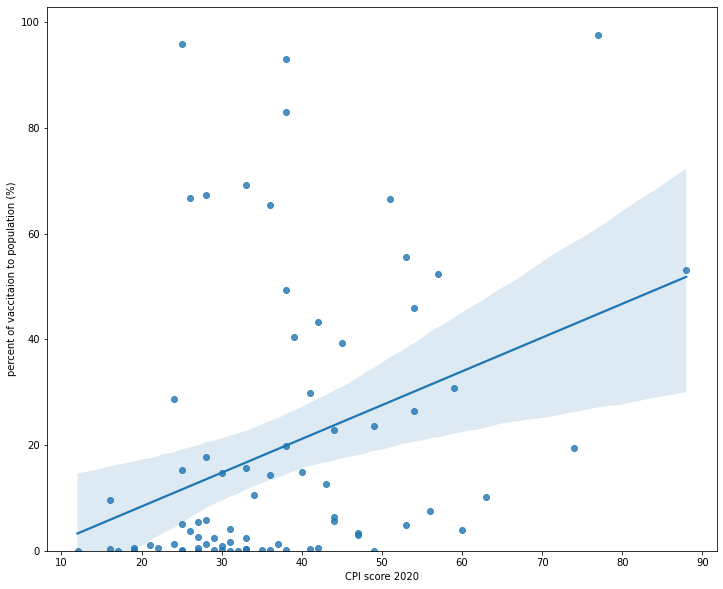

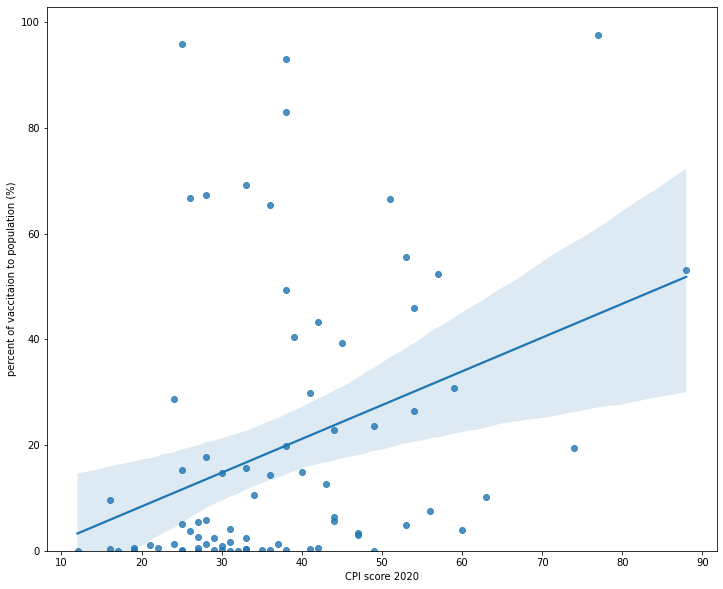

In [38]:
sns.regplot(x="CPI score 2020", y="percent of vaccination to population (%)", data= CPI_vs_vac)
plt.ylim(0,)

In [39]:
Vaccines_Origin_Country

vaccine          origin_country
0     Pfizer/BioNTech  United States, Germany
1             Moderna           United States
2  Oxford/AstraZeneca  United Kingdom, Sweden
3           Sinopharm                   China
4           Sputnik V                  Russia
5                CNBG                   China
6             Sinovac                   China
7             Covaxin                   India

vaccine          origin_country
0     Pfizer/BioNTech  United States, Germany
1             Moderna           United States
2  Oxford/AstraZeneca  United Kingdom, Sweden
3           Sinopharm                   China
4           Sputnik V                  Russia
5                CNBG                   China
6             Sinovac                   China
7             Covaxin                   India

In [40]:
cls =['United States of America' ,'Germany' , 'United Kingdom' , 'Sweden' ,'China' ,'Russian Federation' ,'India']
Vac_Orgn_Ctrs =demographics [demographics['country'].isin(cls)]

In [41]:
cls =['United States of America' ,'Germany' , 'United Kingdom' , 'Sweden' ,'China' ,'Russian Federation' ,'India']
Vac_Orgn_Ctrs =demographics [demographics['country'].isin(cls)]

print ("The avarage percent of fully-vaccinated people to the total population of the vaccines' developer countries is:"
       , int(Vac_Orgn_Ctrs["percent of vaccination to population (%)"].mean()) ,"%")

The avarage percent of fully-vaccinated people to the total population of the vaccines' developer countries is: 720 %
The avarage percent of fully-vaccinated people to the total population of the vaccines' developer countries is: 720 %
